In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_graph(b, name = 'x', phase = False, graph_name = 'Magnitude response'):
    w, h = signal.freqz(b)
    w_n = w/max(w)
    
    if phase:
        angles = np.unwrap(np.angle(h))
        plt.plot(w_n, angles, label=f'{name}')
        plt.ylabel("Phase (rad)")

    else:
        h_n = 20 * np.log10 (abs(h))
        plt.plot(w_n,h_n, label=f'{name}')
        plt.ylabel("Magnitude (db)")

    
    plt.legend()
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    plt.title(f'{graph_name}')

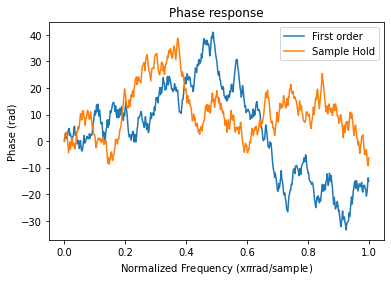

In [39]:
# Values init
N = 10 ** 3;
x = np.random.randn(1, N)[0]
order = 100

Fpass = 10 **6
Fs = 4 * Fpass 
# Normalization
F_n = 2 * Fpass / Fs

# Create FIR window
filt = signal.firwin(order, F_n, pass_zero= 'lowpass')

# Noise filtration
x_filt = np.convolve(x, filt)
# Add another triangle signal
tr = signal.triang(order)

#
plot_graph(y, name = 'First order', phase = True, graph_name = 'Phase response')
# Restoration
y = np.convolve(x_filt, tr)
plot_graph(y, name = 'Sample Hold', phase = True, graph_name = 'Phase response')

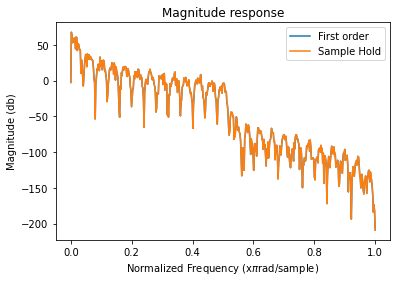

In [40]:
plot_graph(y, name = 'First order')
# Restoration
y = np.convolve(x_filt, tr)
plot_graph(y, name = 'Sample Hold')